In [1]:
!pip install -U geovoronoi[plotting]

  Using cached geovoronoi-0.4.0-py3-none-any.whl (21 kB)
     |████████████████████████████████| 1.2 MB 3.0 MB/s eta 0:00:01
  Using cached geopandas-0.10.2-py2.py3-none-any.whl (1.0 MB)
  Using cached descartes-1.1.0-py3-none-any.whl (5.8 kB)
     |████████████████████████████████| 7.7 MB 22.7 MB/s eta 0:00:01
     |████████████████████████████████| 18.5 MB 20.5 MB/s eta 0:00:01
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
  Using cached munch-2.5.0-py2.py3-none-any.whl (10 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)


In [2]:
!pip install shapely

In [3]:
#!conda install -c conda-forge -y geopandas
!pip install geopandas

In [4]:
from shapely.geometry import box
from geovoronoi import voronoi_regions_from_coords as vrfc
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

In [109]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
area = world[world.name == 'Spain']

area = area.to_crs(epsg=4258)
area_shape = area.iloc[0].geometry   # get the Polygon.

In [111]:
df = pd.read_csv ('capital.csv')
df = df[['Lon ETRS89','Lat ETRS89']]

In [112]:
coords = df.to_numpy()

In [113]:
from geovoronoi import voronoi_regions_from_coords

region_polys, region_pts = voronoi_regions_from_coords(coords, area_shape)

/Users/xuanzheng/opt/anaconda3/lib/python3.9/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
/Users/xuanzheng/opt/anaconda3/lib/python3.9/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +


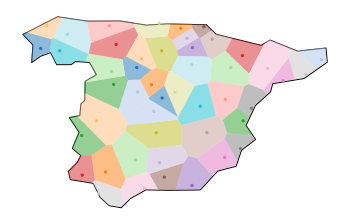

In [114]:
import matplotlib.pyplot as plt
from geovoronoi.plotting import subplot_for_map, plot_voronoi_polys_with_points_in_area

fig, ax = subplot_for_map()
plot_voronoi_polys_with_points_in_area(ax, area_shape, region_polys, coords, region_pts)
plt.show()